In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0,0.5,'Income($)')

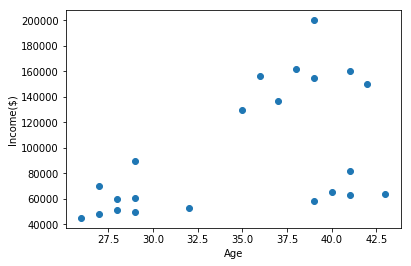

In [3]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

# Kmeans

In [4]:
wcss = []
krange = range(1,10)
for k in krange:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    wcss.append(km.inertia_)

Text(0,0.5,'Within cluster sum of squared error')

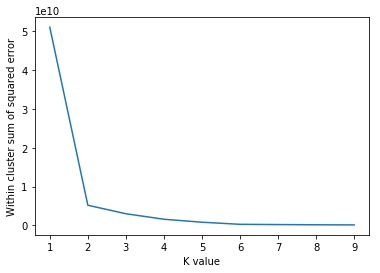

In [5]:
plt.plot(krange,wcss)
plt.xlabel('K value')
plt.ylabel('Within cluster sum of squared error')


In [6]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

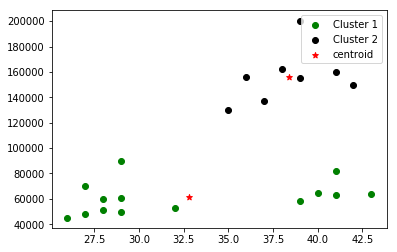

In [7]:
plt.scatter(data[y_predicted==0]['Age'],data[y_predicted==0]['Income($)'],color='green', label = 'Cluster 1')
plt.scatter(data[y_predicted==1]['Age'],data[y_predicted==1]['Income($)'],color='black', label = 'Cluster 2')
#plt.scatter(data[y_predicted==2]['Age'],data[y_predicted==2]['Income($)'],color='blue', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()

In [8]:
#Check clustering accuracy
metrics.silhouette_score(data[['Age','Income($)']],y_predicted)

0.807610841255239

# Hierarchical Clustering

In [9]:
from scipy.cluster.hierarchy import *
lm = linkage(data[['Age','Income($)']],"ward")
lm

array([[2.00000000e+00, 3.00000000e+00, 1.00000050e+03, 2.00000000e+00],
       [1.70000000e+01, 1.80000000e+01, 1.00000200e+03, 2.00000000e+00],
       [5.00000000e+00, 8.00000000e+00, 1.00000450e+03, 2.00000000e+00],
       [1.30000000e+01, 1.40000000e+01, 1.50000033e+03, 2.00000000e+00],
       [1.60000000e+01, 2.30000000e+01, 1.73205235e+03, 3.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 2.00000225e+03, 2.00000000e+00],
       [1.20000000e+01, 2.50000000e+01, 2.59807679e+03, 3.00000000e+00],
       [2.10000000e+01, 2.20000000e+01, 2.88677681e+03, 3.00000000e+00],
       [1.50000000e+01, 2.80000000e+01, 4.28660985e+03, 4.00000000e+00],
       [4.00000000e+00, 2.40000000e+01, 6.35085509e+03, 3.00000000e+00],
       [1.10000000e+01, 3.00000000e+01, 6.79889803e+03, 5.00000000e+00],
       [9.00000000e+00, 1.00000000e+01, 7.00000029e+03, 2.00000000e+00],
       [0.00000000e+00, 2.60000000e+01, 7.34849020e+03, 4.00000000e+00],
       [1.00000000e+00, 2.00000000e+01, 8.00000900e

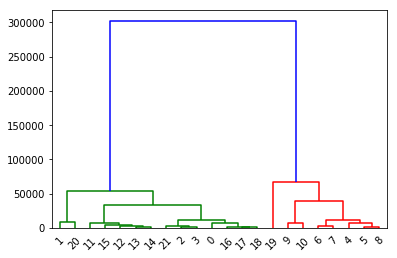

In [10]:
_=dendrogram(lm)

In [11]:
#y_predicted=fcluster(lm,2,criterion='maxclust')
y_predicted=fclusterdata(data[['Age','Income($)']],2,metric='euclidean',method='ward',criterion='maxclust')
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1],
      dtype=int32)

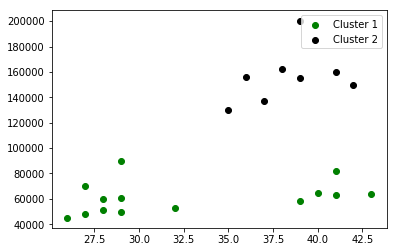

In [12]:
plt.scatter(data[y_predicted==1]['Age'],data[y_predicted==1]['Income($)'],color='green', label = 'Cluster 1')
plt.scatter(data[y_predicted==2]['Age'],data[y_predicted==2]['Income($)'],color='black', label = 'Cluster 2')
#plt.scatter(data[y_predicted==3]['Age'],data[y_predicted==3]['Income($)'],color='blue', label = 'Cluster 3')
#plt.scatter(data['Age'],data['Income($)'],color='red',marker='*',label='centroid')
plt.legend()

In [13]:
#Check clustering accuracy
metrics.silhouette_score(data[['Age','Income($)']],y_predicted)

0.807610841255239

# DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [15]:
X = StandardScaler().fit_transform(data[['Age','Income($)']])

In [16]:
db = DBSCAN(eps=0.9, min_samples=2).fit(X)
db

DBSCAN(algorithm='auto', eps=0.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [17]:
y_predicted=db.labels_
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2],
      dtype=int64)

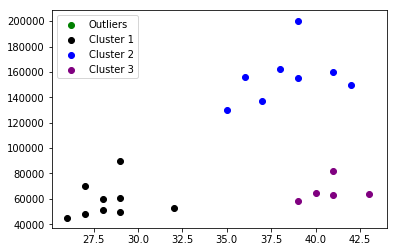

In [18]:
plt.scatter(data[y_predicted==-1]['Age'],data[y_predicted==-1]['Income($)'],color='green', label = 'Outliers')
plt.scatter(data[y_predicted==0]['Age'],data[y_predicted==0]['Income($)'],color='black', label = 'Cluster 1')
plt.scatter(data[y_predicted==1]['Age'],data[y_predicted==1]['Income($)'],color='blue', label = 'Cluster 2')
plt.scatter(data[y_predicted==2]['Age'],data[y_predicted==2]['Income($)'],color='purple', label = 'Cluster 3')
#plt.scatter(data[y_predicted==3]['Age'],data[y_predicted==3]['Income($)'],color='red', label = 'Cluster 5')
plt.legend()

In [19]:
#Check clustering accuracy
metrics.silhouette_score(data[['Age','Income($)']],y_predicted)

0.3258847091496508